In [1]:
import requests
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


%matplotlib inline

In [2]:
# brought in api that handles nashville code complaints
endpoint1 = 'https://data.nashville.gov/resource/479w-kw2x.json?$limit=5000000'

response1 = requests.get(endpoint1)
response1

<Response [200]>

In [3]:
res1 = response1.json()
complaint = pd.DataFrame(res1)
complaint

,request,date_received,property_apn,property_address,city,state,zip,property_owner,complaint_source,reported_problem,...,:@computed_region_sjpq_96s8,:@computed_region_v3ji_vzam,:@computed_region_c9xn_skx3,:@computed_region_f73m_vb2k,:@computed_region_kh5x_g7w5,:@computed_region_yf9r_ed6g,:@computed_region_fvtq_wnma,:@computed_region_b9k3_hpc2,:@computed_region_cfa7_hbpz,violations_noted
0,21-1262615,2021-05-05T00:00:00.000,07108025800,631 E TRINITY LN,NASHVILLE,TN,37207,"CAULEY, JAKE DOUGLAS",INSPECTOR REPORTED,SIGN REMOVAL,...,15550,2005,6,7,6,6,31,7,NaN,NaN
1,23-1353659,2023-09-01T00:00:00.000,08204013500,1003 N 6TH ST,NASHVILLE,TN,37207,"HUGHES, TIMOTHY & ERIN",Audit,NVF,...,15550,2005,6,7,6,6,31,7,32,NaN
2,21-1279382,2021-10-29T00:00:00.000,07205018500,0 E TRINITY LN,NASHVILLE,TN,37207,"AFFORDABLE HOUSING RESOURCES, INC",INSPECTOR REPORTED,SIGN REMOVAL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,23-1344098,2023-06-16T00:00:00.000,07102002800,1240 N AVONDALE CIR,NASHVILLE,TN,37207,"SPRUILL, ZACHARY",HUB,Type: Property Violations - Tall Grass and Wee...,...,15550,2005,2,1,2,2,31,1,NaN,NaN
4,20-1247880,2020-11-24T00:00:00.000,NaN,NaN,NaN,NaN,NaN,OWNER INFO UNAVAILABLE,INSPECTOR REPORTED,SIGN REMOVAL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116734,23-1336713,2023-04-25T00:00:00.000,09110012300,5502 WINN AVE,NASHVILLE,TN,37209,METRO GOV'T WW WATER & SEWER,INSPECTOR REPORTED,imv,...,15798,2005,14,1,14,14,12,1,642,EXTERIOR PROP AREA � OPEN STORAGE - VEH
116735,21-1267700,2021-06-23T00:00:00.000,07112030500,1419 LISCHEY AVE,NASHVILLE,TN,37207,"HOLTKAMP PROPERTY HOLDINGS, LP",OTHER SOURCE,LANDLORD REGISTRATION EXPIRED,...,15550,2005,6,7,6,6,31,7,577,LANDLORD REGISTRATION
116736,21-1277959,2021-10-13T00:00:00.000,07108001400,322 QUEEN AVE,NASHVILLE,TN,37207,PADRE PIO PROPERTIES LLC,PHONE,Abandoned vehicle Silver Honda Accord with fla...,...,15550,2005,6,2,6,6,31,2,472,NaN
116737,22-1316584,2022-11-17T00:00:00.000,10415019100,2218 ASHWOOD AVE,NASHVILLE,TN,37212,"GRATTON, ERIK & ERIN E. HALL",Audit,NVF,...,15804,2005,12,6,12,12,13,6,578,NaN


In [4]:
complaint.columns

Index(['request', 'date_received', 'property_apn', 'property_address', 'city',
       'state', 'zip', 'property_owner', 'complaint_source',
       'reported_problem', 'status', 'council_district', 'last_activity_date',
       'last_activity', 'last_activity_result', 'mapped_location',
       ':@computed_region_wvby_4s8j', ':@computed_region_3aw5_2wv7',
       ':@computed_region_p6sk_2acq', ':@computed_region_gxvr_9jxz',
       ':@computed_region_gisn_y5cm', ':@computed_region_sjpq_96s8',
       ':@computed_region_v3ji_vzam', ':@computed_region_c9xn_skx3',
       ':@computed_region_f73m_vb2k', ':@computed_region_kh5x_g7w5',
       ':@computed_region_yf9r_ed6g', ':@computed_region_fvtq_wnma',
       ':@computed_region_b9k3_hpc2', ':@computed_region_cfa7_hbpz',
       'violations_noted'],
      dtype='object')

In [5]:
#drop unnecessary columns
complaint = complaint.drop(columns = [':@computed_region_wvby_4s8j', ':@computed_region_3aw5_2wv7',
       ':@computed_region_p6sk_2acq', ':@computed_region_gxvr_9jxz',
       ':@computed_region_gisn_y5cm', ':@computed_region_sjpq_96s8',
       ':@computed_region_v3ji_vzam', ':@computed_region_c9xn_skx3',
       ':@computed_region_f73m_vb2k', ':@computed_region_kh5x_g7w5',
       ':@computed_region_yf9r_ed6g', ':@computed_region_fvtq_wnma',
       ':@computed_region_b9k3_hpc2', 'violations_noted',
       ':@computed_region_cfa7_hbpz', 'council_district'])
complaint

,request,date_received,property_apn,property_address,city,state,zip,property_owner,complaint_source,reported_problem,status,last_activity_date,last_activity,last_activity_result,mapped_location
0,21-1262615,2021-05-05T00:00:00.000,07108025800,631 E TRINITY LN,NASHVILLE,TN,37207,"CAULEY, JAKE DOUGLAS",INSPECTOR REPORTED,SIGN REMOVAL,DONE,2021-05-05T00:00:00.000,PS - Sign Removal,DONE,"{'latitude': '36.204776', 'longitude': '-86.75..."
1,23-1353659,2023-09-01T00:00:00.000,08204013500,1003 N 6TH ST,NASHVILLE,TN,37207,"HUGHES, TIMOTHY & ERIN",Audit,NVF,DONE,2023-09-01T00:00:00.000,Initial Audit Inspection - PS,PS - No Violation Found - Audit,"{'latitude': '36.188524014', 'longitude': '-86..."
2,21-1279382,2021-10-29T00:00:00.000,07205018500,0 E TRINITY LN,NASHVILLE,TN,37207,"AFFORDABLE HOUSING RESOURCES, INC",INSPECTOR REPORTED,SIGN REMOVAL,DONE,2021-10-29T00:00:00.000,PS - Sign Removal,DONE,"{'human_address': '{""address"": ""0 E TRINITY LN..."
3,23-1344098,2023-06-16T00:00:00.000,07102002800,1240 N AVONDALE CIR,NASHVILLE,TN,37207,"SPRUILL, ZACHARY",HUB,Type: Property Violations - Tall Grass and Wee...,DONE,2023-06-19T00:00:00.000,PS - Close Out Reason,DONE,"{'latitude': '36.209425002000046', 'longitude'..."
4,20-1247880,2020-11-24T00:00:00.000,NaN,NaN,NaN,NaN,NaN,OWNER INFO UNAVAILABLE,INSPECTOR REPORTED,SIGN REMOVAL,DONE,2020-11-24T00:00:00.000,PS - Sign Removal,DONE,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116734,23-1336713,2023-04-25T00:00:00.000,09110012300,5502 WINN AVE,NASHVILLE,TN,37209,METRO GOV'T WW WATER & SEWER,INSPECTOR REPORTED,imv,DONE,2023-05-25T00:00:00.000,Violation Inspection - PS,Violation Resolved,"{'latitude': '36.15531198', 'longitude': '-86...."
116735,21-1267700,2021-06-23T00:00:00.000,07112030500,1419 LISCHEY AVE,NASHVILLE,TN,37207,"HOLTKAMP PROPERTY HOLDINGS, LP",OTHER SOURCE,LANDLORD REGISTRATION EXPIRED,DONE,2021-07-20T00:00:00.000,Violation Inspection - PS,Violation Resolved,"{'latitude': '36.197965013', 'longitude': '-86..."
116736,21-1277959,2021-10-13T00:00:00.000,07108001400,322 QUEEN AVE,NASHVILLE,TN,37207,PADRE PIO PROPERTIES LLC,PHONE,Abandoned vehicle Silver Honda Accord with fla...,DONE,2021-10-25T00:00:00.000,Violation Inspection CAR - PS,Violation Resolved,"{'latitude': '36.207767984', 'longitude': '-86..."
116737,22-1316584,2022-11-17T00:00:00.000,10415019100,2218 ASHWOOD AVE,NASHVILLE,TN,37212,"GRATTON, ERIK & ERIN E. HALL",Audit,NVF,DONE,2022-11-17T00:00:00.000,Initial Audit Inspection - PS,PS - No Violation Found - Audit,"{'latitude': '36.130078009', 'longitude': '-86..."


In [6]:
#brought in api that handles nashville building permits
endpoint2 = 'https://data.nashville.gov/resource/3h5w-q8b7.json?$limit=5000000'

response2 = requests.get(endpoint2)
response2

<Response [200]>

In [7]:
res2 = response2.json()
permit = pd.DataFrame(res2)
permit

,permit,permit_type_description,permit_subtype_description,parcel,date_entered,date_issued,const_cost,address,city,state,...,:@computed_region_v3ji_vzam,:@computed_region_c9xn_skx3,:@computed_region_sjpq_96s8,:@computed_region_kh5x_g7w5,:@computed_region_yf9r_ed6g,:@computed_region_fvtq_wnma,:@computed_region_p6sk_2acq,:@computed_region_b9k3_hpc2,:@computed_region_gxvr_9jxz,:@computed_region_cfa7_hbpz
0,2023056110,Building Residential - New,"Multifamily, Townhome",181150A03700CO,2023-08-14T00:00:00.000,2023-11-16T00:00:00.000,214352,478 PORTSDALE DR,BRENTWOOD,TN,...,2005,29,24062,29,29,2,29,3,15,NaN
1,2023088568,Building Residential - Rehab,Single Family Residence,157080A05100CO,2023-11-10T00:00:00.000,2023-11-16T00:00:00.000,70000,201 MIDDLETON CT,NASHVILLE,TN,...,2005,34,15809,34,34,22,34,6,47,789
2,2023075762,Building Commercial - Rehab,"General Office, Professional Services",03300008300,2023-10-05T00:00:00.000,2023-11-16T00:00:00.000,83000,1243 DICKERSON PIKE,GOODLETTSVILLE,TN,...,2005,9,13132,9,9,41,16,2,41,NaN
3,2023079024,Building Commercial - Rehab,"College / University, Educational > 12Th",10403007100,2023-10-16T00:00:00.000,2023-11-16T00:00:00.000,8900000,2600 JESS NEELY DR,NASHVILLE,TN,...,2005,12,30406,12,12,13,19,6,36,NaN
4,2023080614,Building Commercial - Rehab,"Multifamily, Tri-Plex, Quad, Apartments",09302316600,2023-10-19T00:00:00.000,2023-11-16T00:00:00.000,400000,209 PRINTERS ALY 601,NASHVILLE,TN,...,2005,13,16169,13,13,14,20,7,1,50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34355,2020064349,Building Demolition Permit,Demolition Permit - Residential,08203022100,2020-10-13T00:00:00.000,2020-11-12T00:00:00.000,5000,837 STOCKELL ST,NASHVILLE,TN,...,2005,6,15550,6,6,31,13,7,16,29
34356,2020065511,Building Commercial - Rehab,"General Office, Professional Services",16000024300,2020-10-19T00:00:00.000,2020-11-12T00:00:00.000,40116,320 SEVEN SPRINGS WAY 320,BRENTWOOD,TN,...,2005,5,24382,5,5,35,5,6,31,NaN
34357,2020070971,Building Tree Removal Permit,Tree Removal Permit,16100002600,2020-11-12T00:00:00.000,2020-11-12T00:00:00.000,10,5423 EDMONDSON PIKE,NASHVILLE,TN,...,2005,5,24382,5,5,46,5,3,3,NaN
34358,2020067286,Building Demolition Permit,Demolition Permit - Residential,13111007400,2020-10-27T00:00:00.000,2020-11-12T00:00:00.000,10000,4612 BELMONT PARK TER,NASHVILLE,TN,...,2005,34,15809,34,34,22,34,6,47,637


In [8]:
permit.columns

Index(['permit', 'permit_type_description', 'permit_subtype_description',
       'parcel', 'date_entered', 'date_issued', 'const_cost', 'address',
       'city', 'state', 'zip', 'subdivision_lot', 'contact', 'per_ty',
       'permit_subtype', 'ivr_trk', 'purpose', 'council_dist', 'census_tract',
       'mapped_location', ':@computed_region_f73m_vb2k',
       ':@computed_region_gisn_y5cm', ':@computed_region_v3ji_vzam',
       ':@computed_region_c9xn_skx3', ':@computed_region_sjpq_96s8',
       ':@computed_region_kh5x_g7w5', ':@computed_region_yf9r_ed6g',
       ':@computed_region_fvtq_wnma', ':@computed_region_p6sk_2acq',
       ':@computed_region_b9k3_hpc2', ':@computed_region_gxvr_9jxz',
       ':@computed_region_cfa7_hbpz'],
      dtype='object')

In [9]:
#drop unnecessary columns 
permit = permit.drop(columns = ['per_ty', 'permit_subtype', 'ivr_trk', 'council_dist', 'census_tract',
       ':@computed_region_cfa7_hbpz', ':@computed_region_gisn_y5cm',
       ':@computed_region_v3ji_vzam', ':@computed_region_c9xn_skx3',
       ':@computed_region_sjpq_96s8', ':@computed_region_kh5x_g7w5',
       ':@computed_region_yf9r_ed6g', ':@computed_region_fvtq_wnma',
       ':@computed_region_p6sk_2acq', ':@computed_region_b9k3_hpc2',
       ':@computed_region_gxvr_9jxz', ':@computed_region_f73m_vb2k',])
permit

,permit,permit_type_description,permit_subtype_description,parcel,date_entered,date_issued,const_cost,address,city,state,zip,subdivision_lot,contact,purpose,mapped_location
0,2023056110,Building Residential - New,"Multifamily, Townhome",181150A03700CO,2023-08-14T00:00:00.000,2023-11-16T00:00:00.000,214352,478 PORTSDALE DR,BRENTWOOD,TN,37027,LOT 37 SOUTHPOINT SP PH 3,LANDMARK HOMES OF TN INC,"Per Master Permit #2022074939, to construct a ...","{'latitude': '35.994661993', 'longitude': '-86..."
1,2023088568,Building Residential - Rehab,Single Family Residence,157080A05100CO,2023-11-10T00:00:00.000,2023-11-16T00:00:00.000,70000,201 MIDDLETON CT,NASHVILLE,TN,37215,LOT 51 MIDDLETON 3RD REV,Sovereign Builders,take existing garage closet and make usual squ...,"{'latitude': '36.048917005', 'longitude': '-86..."
2,2023075762,Building Commercial - Rehab,"General Office, Professional Services",03300008300,2023-10-05T00:00:00.000,2023-11-16T00:00:00.000,83000,1243 DICKERSON PIKE,GOODLETTSVILLE,TN,37072,W SIDE DICKERSON PK S OF CAMPBELL RD,CRANE BUILDERS LLC,To conduct general renovations to existing non...,"{'latitude': '36.291271317', 'longitude': '-86..."
3,2023079024,Building Commercial - Rehab,"College / University, Educational > 12Th",10403007100,2023-10-16T00:00:00.000,2023-11-16T00:00:00.000,8900000,2600 JESS NEELY DR,NASHVILLE,TN,37212,E/S NATCHEZ TRACE S OF WEST END AV-PT CL ALLEY,"BARTON MALOW BUILDERS, LLC",To conduct general renovations for Vanderbilt ...,"{'latitude': '36.142886795', 'longitude': '-86..."
4,2023080614,Building Commercial - Rehab,"Multifamily, Tri-Plex, Quad, Apartments",09302316600,2023-10-19T00:00:00.000,2023-11-16T00:00:00.000,400000,209 PRINTERS ALY 601,NASHVILLE,TN,37201,PT LOT 41 ORIGINAL TOWN OF NASHVILLE,dawson higgs,to conduct renovations to 6th floor to convert...,"{'latitude': '36.164251328', 'longitude': '-86..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34355,2020064349,Building Demolition Permit,Demolition Permit - Residential,08203022100,2020-10-13T00:00:00.000,2020-11-12T00:00:00.000,5000,837 STOCKELL ST,NASHVILLE,TN,37207,LOT 83 DR V S LINDSLEYAND & PT LT 1 DR V S LI...,EASTEND CONTRACTING LLC,to demolish exiting single family residence. n...,"{'latitude': '36.18662501', 'longitude': '-86...."
34356,2020065511,Building Commercial - Rehab,"General Office, Professional Services",16000024300,2020-10-19T00:00:00.000,2020-11-12T00:00:00.000,40116,320 SEVEN SPRINGS WAY 320,BRENTWOOD,TN,37027,"LOT 2 RESUB LTS 1,2,3 SEVEN SPRINGS RESUB LOT 4","CORPORATE CONTRACTING, LLC",Demise existing suite to create new office and...,"{'latitude': '36.041593964', 'longitude': '-86..."
34357,2020070971,Building Tree Removal Permit,Tree Removal Permit,16100002600,2020-11-12T00:00:00.000,2020-11-12T00:00:00.000,10,5423 EDMONDSON PIKE,NASHVILLE,TN,37211,"W SIDE EDMONDSON PK, N OF OLD HICKORY BLVD","VBG, LLC",NaN,"{'latitude': '36.046908994', 'longitude': '-86..."
34358,2020067286,Building Demolition Permit,Demolition Permit - Residential,13111007400,2020-10-27T00:00:00.000,2020-11-12T00:00:00.000,10000,4612 BELMONT PARK TER,NASHVILLE,TN,37215,LOT 32 SEC 1 SEVEN HILLS,PROVINCE BUILDERS LLC,Work on this demolition permit must commence w...,"{'latitude': '36.088206003', 'longitude': '-86..."


In [10]:
# joined both dataframes by address. Since address in system is defualt to all caps and must be accurate for both, no cleaning needed.
building_complaints = pd.merge(complaint, permit, 
                               left_on = 'property_address', right_on = 'address', 
                               how = 'inner')
building_complaints

,request,date_received,property_apn,property_address,city_x,state_x,zip_x,property_owner,complaint_source,reported_problem,...,date_issued,const_cost,address,city_y,state_y,zip_y,subdivision_lot,contact,purpose,mapped_location_y
0,23-1359337,2023-10-17T00:00:00.000,07102011000,460 ROGER WILLIAMS AVE,NASHVILLE,TN,37207,"COLE WOODWORKS, LLC",PHONE,JUNK TRASH DEBRIS,...,2022-09-06T00:00:00.000,298614,460 ROGER WILLIAMS AVE,NASHVILLE,TN,37207,PT OF LOT 34 RUCKER SUB BROOKLYN,COLE WOODWORKS LLC,To construct single family residence with 2463...,"{'latitude': '36.212880191', 'longitude': '-86..."
1,21-1251285,2021-01-04T00:00:00.000,07102011000,460 ROGER WILLIAMS AVE,NASHVILLE,TN,37207,"MUSIC CITY FINANCIAL, LLC",HUB,PROBLEM REPORTED,...,2022-09-06T00:00:00.000,298614,460 ROGER WILLIAMS AVE,NASHVILLE,TN,37207,PT OF LOT 34 RUCKER SUB BROOKLYN,COLE WOODWORKS LLC,To construct single family residence with 2463...,"{'latitude': '36.212880191', 'longitude': '-86..."
2,23-1350498,2023-08-10T00:00:00.000,150090A05000CO,801 LONSWAY CT,ANTIOCH,TN,37013,"TALABI, OLUKAYODE",INSPECTOR REPORTED,inspector reported - no strp,...,2022-12-06T00:00:00.000,20000,801 LONSWAY CT,ANTIOCH,TN,37013,LOT 204 FOREST VIEW PARK SEC 7,SELF CONTRACTOR RESIDENTIAL (SEE APPLICANT INF...,To convert an 440 sq ft attached garage into a...,"{'latitude': '36.067119984', 'longitude': '-86..."
3,21-1253336,2021-01-25T00:00:00.000,150090A05000CO,801 LONSWAY CT,ANTIOCH,TN,37013,"TALABI, OLUKAYODE",Audit,NVF,...,2022-12-06T00:00:00.000,20000,801 LONSWAY CT,ANTIOCH,TN,37013,LOT 204 FOREST VIEW PARK SEC 7,SELF CONTRACTOR RESIDENTIAL (SEE APPLICANT INF...,To convert an 440 sq ft attached garage into a...,"{'latitude': '36.067119984', 'longitude': '-86..."
4,23-1359404,2023-10-18T00:00:00.000,08212039600,30 MCFERRIN AVE,NASHVILLE,TN,37206,AMPLIFY EQUITIES LLC & ET AL,INSPECTOR REPORTED,SIGN REMOVAL,...,2020-12-15T00:00:00.000,5700000,30 MCFERRIN AVE,NASHVILLE,TN,37206,LOT 2 EAST SIDE APARTMENT,BLUSKY RESTORATION CONTRACTORS LLC,storm damage for AMPLIFY APTS POC PRESTON QU...,"{'latitude': '36.176820992', 'longitude': '-86..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23724,22-1292469,2022-03-29T00:00:00.000,04306006500,308 SINGER DR,MADISON,TN,37115,"FORBES, ROSEMARY DIANNE",Audit,NO VIOLATION FOUND,...,2022-06-17T00:00:00.000,23500,308 SINGER DR,MADISON,TN,37115,LOT 137 SEC 2 MADISON PARK,virginia davis,to conduct interior renovations to existing si...,"{'latitude': '36.271005001', 'longitude': '-86..."
23725,22-1284631,2022-01-04T00:00:00.000,05205007100,422 EMMITT AVE,MADISON,TN,37115,"BRADBURY, DONNA",Audit,PARKING ON GRASS,...,2022-02-02T00:00:00.000,14900,422 EMMITT AVE,MADISON,TN,37115,LOT 40 BL I POWER&ROTH SUB OF MADISON PK,FOREST HILLS REMODELING LLC,Interior renovations to existing single family...,"{'latitude': '36.250683999', 'longitude': '-86..."
23726,22-1310066,2022-09-22T00:00:00.000,10414008500,2905 WESTMORELAND DR,NASHVILLE,TN,37212,"JANSSEN, ANDREW P. & SIBYL M.",Audit,NVF,...,2023-03-29T00:00:00.000,76381,2905 WESTMORELAND DR,NASHVILLE,TN,37212,PT LOTS 38 39 WESTMORELAND PLACE,"DOUBLE EDGE BUILDERS, LLC",RESTRITIVE COVENANT FOR DETACHED STRUCTURE 202...,"{'latitude': '36.130255999', 'longitude': '-86..."
23727,22-1310066,2022-09-22T00:00:00.000,10414008500,2905 WESTMORELAND DR,NASHVILLE,TN,37212,"JANSSEN, ANDREW P. & SIBYL M.",Audit,NVF,...,2022-09-19T00:00:00.000,103781,2905 WESTMORELAND DR,NASHVILLE,TN,37212,PT LOTS 38 39 WESTMORELAND PLACE,Double Edge Builders LLC,Home remodel with an addition within the origi...,"{'latitude': '36.130255999', 'longitude': '-86..."


In [11]:
# created a criteria that removed any building complaints that were 'no violations found or NVF'
criteria = (building_complaints['reported_problem'] == 'NVF') | (building_complaints['reported_problem'] == 'NO VIOLATION FOUND')
building_complaints = building_complaints[~criteria]
building_complaints

,request,date_received,property_apn,property_address,city_x,state_x,zip_x,property_owner,complaint_source,reported_problem,...,date_issued,const_cost,address,city_y,state_y,zip_y,subdivision_lot,contact,purpose,mapped_location_y
0,23-1359337,2023-10-17T00:00:00.000,07102011000,460 ROGER WILLIAMS AVE,NASHVILLE,TN,37207,"COLE WOODWORKS, LLC",PHONE,JUNK TRASH DEBRIS,...,2022-09-06T00:00:00.000,298614,460 ROGER WILLIAMS AVE,NASHVILLE,TN,37207,PT OF LOT 34 RUCKER SUB BROOKLYN,COLE WOODWORKS LLC,To construct single family residence with 2463...,"{'latitude': '36.212880191', 'longitude': '-86..."
1,21-1251285,2021-01-04T00:00:00.000,07102011000,460 ROGER WILLIAMS AVE,NASHVILLE,TN,37207,"MUSIC CITY FINANCIAL, LLC",HUB,PROBLEM REPORTED,...,2022-09-06T00:00:00.000,298614,460 ROGER WILLIAMS AVE,NASHVILLE,TN,37207,PT OF LOT 34 RUCKER SUB BROOKLYN,COLE WOODWORKS LLC,To construct single family residence with 2463...,"{'latitude': '36.212880191', 'longitude': '-86..."
2,23-1350498,2023-08-10T00:00:00.000,150090A05000CO,801 LONSWAY CT,ANTIOCH,TN,37013,"TALABI, OLUKAYODE",INSPECTOR REPORTED,inspector reported - no strp,...,2022-12-06T00:00:00.000,20000,801 LONSWAY CT,ANTIOCH,TN,37013,LOT 204 FOREST VIEW PARK SEC 7,SELF CONTRACTOR RESIDENTIAL (SEE APPLICANT INF...,To convert an 440 sq ft attached garage into a...,"{'latitude': '36.067119984', 'longitude': '-86..."
4,23-1359404,2023-10-18T00:00:00.000,08212039600,30 MCFERRIN AVE,NASHVILLE,TN,37206,AMPLIFY EQUITIES LLC & ET AL,INSPECTOR REPORTED,SIGN REMOVAL,...,2020-12-15T00:00:00.000,5700000,30 MCFERRIN AVE,NASHVILLE,TN,37206,LOT 2 EAST SIDE APARTMENT,BLUSKY RESTORATION CONTRACTORS LLC,storm damage for AMPLIFY APTS POC PRESTON QU...,"{'latitude': '36.176820992', 'longitude': '-86..."
5,23-1356475,2023-09-25T00:00:00.000,08212039600,30 MCFERRIN AVE,NASHVILLE,TN,37206,AMPLIFY EQUITIES LLC & ET AL,INSPECTOR REPORTED,SIGN REMOVAL,...,2020-12-15T00:00:00.000,5700000,30 MCFERRIN AVE,NASHVILLE,TN,37206,LOT 2 EAST SIDE APARTMENT,BLUSKY RESTORATION CONTRACTORS LLC,storm damage for AMPLIFY APTS POC PRESTON QU...,"{'latitude': '36.176820992', 'longitude': '-86..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23719,21-1261270,2021-04-23T00:00:00.000,05202001600,424 LANIER DR,MADISON,TN,37115,AMALFI RENOVATION & DESIGN,INSPECTOR REPORTED,"SWO, BLDG PERMIT.",...,2021-11-12T00:00:00.000,300000,424 LANIER DR,MADISON,TN,37115,LOT 18 BLK E RAINBOW TERRACE,CG Renovations,TO CONSTRUCT SINGLE FAMILY RESIDENCE WITH 2028...,"{'latitude': '36.25760502', 'longitude': '-86...."
23720,21-1261270,2021-04-23T00:00:00.000,05202001600,424 LANIER DR,MADISON,TN,37115,AMALFI RENOVATION & DESIGN,INSPECTOR REPORTED,"SWO, BLDG PERMIT.",...,2021-07-29T00:00:00.000,10000,424 LANIER DR,MADISON,TN,37115,LOT 18 BLK E RAINBOW TERRACE,Bledi Tahiri 615.403.0016,Demolition of existing house and all outbuildi...,"{'latitude': '36.25760502', 'longitude': '-86...."
23721,23-1326731,2023-02-07T00:00:00.000,09500010300,2601 ELM HILL PIKE,NASHVILLE,TN,37214,"ELM HILL HOLDINGS, LLC",INSPECTOR REPORTED,SIGN REMOVAL,...,2023-06-22T00:00:00.000,6000,2601 ELM HILL PIKE,NASHVILLE,TN,37214,PT LOT 4 PERIMETER PLACE SEC. 3,TRI STAR TRANSPORT LLC,To reface tenant panel on an existing pylon si...,"{'latitude': '36.150903979', 'longitude': '-86..."
23725,22-1284631,2022-01-04T00:00:00.000,05205007100,422 EMMITT AVE,MADISON,TN,37115,"BRADBURY, DONNA",Audit,PARKING ON GRASS,...,2022-02-02T00:00:00.000,14900,422 EMMITT AVE,MADISON,TN,37115,LOT 40 BL I POWER&ROTH SUB OF MADISON PK,FOREST HILLS REMODELING LLC,Interior renovations to existing single family...,"{'latitude': '36.250683999', 'longitude': '-86..."


In [12]:
#deleting and renaming columns
building_complaints = building_complaints.drop(columns = ['parcel', 'date_entered','subdivision_lot', 'address','permit', 'permit_type_description', 'status', 'last_activity_date', 'last_activity', 'last_activity_result', 'request','city_x','state_x', 'zip_x', 'mapped_location_x', 'property_apn', 'const_cost'])
building_complaints  = building_complaints.rename(columns = {'date_issued': 'permit_date', 'date_received': 'complaint_date', 'permit_subtype_description': 'permit_description'})

In [13]:
building_complaints.columns

Index(['complaint_date', 'property_address', 'property_owner',
       'complaint_source', 'reported_problem', 'permit_description',
       'permit_date', 'city_y', 'state_y', 'zip_y', 'contact', 'purpose',
       'mapped_location_y'],
      dtype='object')

In [14]:
#reordering columns
building_complaints = building_complaints[['property_address', 'city_y', 'state_y', 'zip_y', 'mapped_location_y', 
                                           'property_owner', 'contact', 'permit_date', 'permit_description', 'purpose', 
                                           'complaint_date', 'complaint_source', 'reported_problem']]
building_complaints

,property_address,city_y,state_y,zip_y,mapped_location_y,property_owner,contact,permit_date,permit_description,purpose,complaint_date,complaint_source,reported_problem
0,460 ROGER WILLIAMS AVE,NASHVILLE,TN,37207,"{'latitude': '36.212880191', 'longitude': '-86...","COLE WOODWORKS, LLC",COLE WOODWORKS LLC,2022-09-06T00:00:00.000,Single Family Residence,To construct single family residence with 2463...,2023-10-17T00:00:00.000,PHONE,JUNK TRASH DEBRIS
1,460 ROGER WILLIAMS AVE,NASHVILLE,TN,37207,"{'latitude': '36.212880191', 'longitude': '-86...","MUSIC CITY FINANCIAL, LLC",COLE WOODWORKS LLC,2022-09-06T00:00:00.000,Single Family Residence,To construct single family residence with 2463...,2021-01-04T00:00:00.000,HUB,PROBLEM REPORTED
2,801 LONSWAY CT,ANTIOCH,TN,37013,"{'latitude': '36.067119984', 'longitude': '-86...","TALABI, OLUKAYODE",SELF CONTRACTOR RESIDENTIAL (SEE APPLICANT INF...,2022-12-06T00:00:00.000,Single Family Residence,To convert an 440 sq ft attached garage into a...,2023-08-10T00:00:00.000,INSPECTOR REPORTED,inspector reported - no strp
4,30 MCFERRIN AVE,NASHVILLE,TN,37206,"{'latitude': '36.176820992', 'longitude': '-86...",AMPLIFY EQUITIES LLC & ET AL,BLUSKY RESTORATION CONTRACTORS LLC,2020-12-15T00:00:00.000,"Multifamily, Apt / Twnhome > 5 Unit Bldg",storm damage for AMPLIFY APTS POC PRESTON QU...,2023-10-18T00:00:00.000,INSPECTOR REPORTED,SIGN REMOVAL
5,30 MCFERRIN AVE,NASHVILLE,TN,37206,"{'latitude': '36.176820992', 'longitude': '-86...",AMPLIFY EQUITIES LLC & ET AL,BLUSKY RESTORATION CONTRACTORS LLC,2020-12-15T00:00:00.000,"Multifamily, Apt / Twnhome > 5 Unit Bldg",storm damage for AMPLIFY APTS POC PRESTON QU...,2023-09-25T00:00:00.000,INSPECTOR REPORTED,SIGN REMOVAL
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23719,424 LANIER DR,MADISON,TN,37115,"{'latitude': '36.25760502', 'longitude': '-86....",AMALFI RENOVATION & DESIGN,CG Renovations,2021-11-12T00:00:00.000,Single Family Residence,TO CONSTRUCT SINGLE FAMILY RESIDENCE WITH 2028...,2021-04-23T00:00:00.000,INSPECTOR REPORTED,"SWO, BLDG PERMIT."
23720,424 LANIER DR,MADISON,TN,37115,"{'latitude': '36.25760502', 'longitude': '-86....",AMALFI RENOVATION & DESIGN,Bledi Tahiri 615.403.0016,2021-07-29T00:00:00.000,Demolition Permit - Residential,Demolition of existing house and all outbuildi...,2021-04-23T00:00:00.000,INSPECTOR REPORTED,"SWO, BLDG PERMIT."
23721,2601 ELM HILL PIKE,NASHVILLE,TN,37214,"{'latitude': '36.150903979', 'longitude': '-86...","ELM HILL HOLDINGS, LLC",TRI STAR TRANSPORT LLC,2023-06-22T00:00:00.000,Sign - Ground / Wall Signs,To reface tenant panel on an existing pylon si...,2023-02-07T00:00:00.000,INSPECTOR REPORTED,SIGN REMOVAL
23725,422 EMMITT AVE,MADISON,TN,37115,"{'latitude': '36.250683999', 'longitude': '-86...","BRADBURY, DONNA",FOREST HILLS REMODELING LLC,2022-02-02T00:00:00.000,Single Family Residence,Interior renovations to existing single family...,2022-01-04T00:00:00.000,Audit,PARKING ON GRASS


In [15]:
#converting to datetime
building_complaints['complaint_datetime'] = pd.to_datetime(building_complaints['complaint_date'])
building_complaints['permit_datetime'] = pd.to_datetime(building_complaints['permit_date'])


In [16]:
#droping old columns that are not datetime
building_complaints = building_complaints.drop(columns = ['permit_date', 'complaint_date'])

In [17]:
#groupby reported property owner counting total addresses
property_owner_results = building_complaints.groupby('property_owner')['property_address'].count().sort_values(ascending=False).head(20)
property_owner_results

property_owner
MAPCO EXPRESS, INC.                                  590
MAPCO PETROLEUM INC.                                 403
KROGER LIMITED PARTNERSHIP I                         386
MOSAIC PROPCO LLC                                    324
GALLATIN REALTY PARTNERS                             284
METROPOLITAN NASHVILLE AIRPORT AUTHORITY             216
MOSAIC PROPCO, LLC & ET AL                           216
WAL-MART REAL ESTATE BUSINESS TRUST                  198
MAGNOLIA WOODLAND, LLC                               180
TRI STAR ENERGY, LLC                                 120
DAVIS, JOE C FOUNDATION DECLARATION OF TRUST, THE    115
HERMITAREL, LLC                                      110
7-ELEVEN, INC                                        108
RIVERCHASE HOLDINGS, LP                              101
MT. VIEW MARKETPLACE, LLC                             93
CPC-8 TO 5, L.P.                                      87
METRO GOV'T  S  EAST JR. & HIGH                       75
CVHC4, LLC      

In [18]:
#groupby reported contact counting total addresses
contact_results = building_complaints.groupby('contact')['property_address'].count().sort_values(ascending=False).head(20)
contact_results

contact
TRI STAR TRANSPORT LLC                                     1519
SELF CONTRACTOR RESIDENTIAL (SEE APPLICANT INFORMATION)    1077
ROBINSON ELECTRIC CO INC                                    671
JOSLIN SIGN & MAINTENANCE CO INC                            666
JEFF ROBERTS                                                454
JARVIS AWARD SIGN AND FLAG CO                               377
TINY'S CONSTRUCTION, LLC                                    361
SELF CONTRACTOR COMMERCIAL (SEE APPLICANT INFORMATION)      347
NASHVILLE SIGNS INC                                         331
BOOM SIGN AND LIGHTING                                      258
BOZMAN SIGN CO INC                                          235
ORTWEIN, BILL SIGNS, INC                                    218
AAA SIGN ME UP LLC                                          172
ADAMS SIGNS INC                                             170
MCRT TENNESSEE CONSTRUCTION LLC                             135
LEGACY SOUTH BUILDERS LLC       

In [19]:
#for loops to clean up reported problems
for fix in building_complaints['reported_problem']:
    if fix == 'Removed' or fix == 'removed':
        building_complaints.loc[building_complaints['reported_problem'] == fix, 'reported_problem'] = 'REMOVED'
for fix in building_complaints['reported_problem']:
    if fix == 'sign':
        building_complaints.loc[building_complaints['reported_problem'] == fix, 'reported_problem'] = 'SIGN'
for fix in building_complaints['reported_problem']:
    if fix == ('SIGN REMOVAL (1)')  or fix == 'SIGN REMOVAL-1' or fix == 'SR.' or fix == 'SIGN REMOVAL' or fix == 'sign removal' or fix == ('SIGN REMOVED - 1') or fix == 'SR' or fix == ('Sign removal') or fix == ('SIGN REMOVED-1') or fix == ('SIGN REMOVAL(1)'):
        building_complaints.loc[building_complaints['reported_problem'] == fix, 'reported_problem'] = 'SIGN REMOVED'
for fix in building_complaints['reported_problem']:
    if fix == 'HIGH GRASS ' or fix == 'HIGH GRASS' or fix == 'high grass weeds' or fix == 'high grass' or fix == 'grass' or fix == 'High grass/weeds' or fix == 'HIGH GRASS AND WEEDS':
        building_complaints.loc[building_complaints['reported_problem'] == fix, 'reported_problem'] = 'HIGH GRASS/WEEDS'

In [20]:
#groupby reported problems counting total addresses
reported_problem_results = building_complaints.groupby('reported_problem')['property_address'].count().sort_values(ascending=False).head(30)
reported_problem_results

reported_problem
SIGN REMOVED                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             4919
REMOVED                                                                                                                                                                                                                                                                                  

In [21]:
#group by date
complaints_over_time = building_complaints.groupby('complaint_datetime')['complaint_datetime'].count().sort_values(ascending=False)

In [22]:
#reset index and make into datafrrame
complaints_timedf = complaints_over_time.reset_index(name='complaint_count')

TypeError: unsupported operand type(s) for *: 'Timestamp' and 'float'

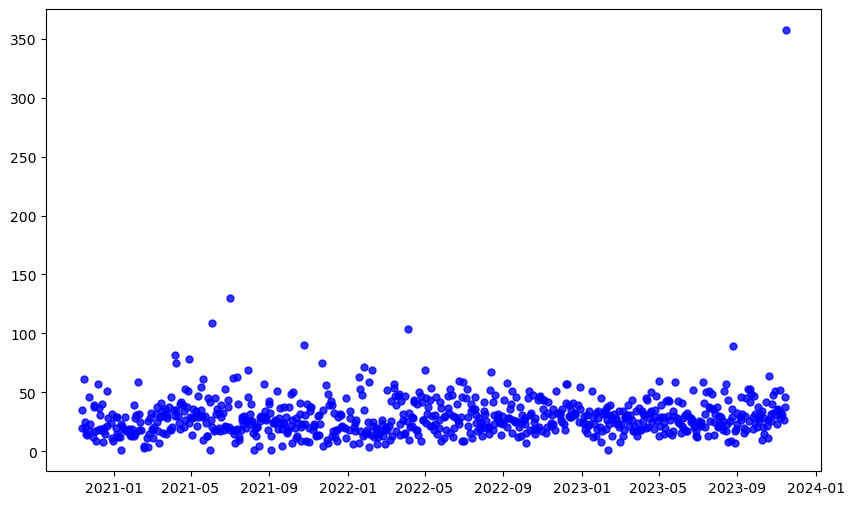

In [23]:
# Scatter plot with regression line
plt.figure(figsize=(10, 6))

sns.regplot(x='complaint_datetime', y='complaint_count', data=complaints_timedf, scatter_kws={"color": "b", "marker": "o", "s": 25}, line_kws={"color": "r", "alpha": 0.7, "lw": 2})

plt.xlabel('Date')
plt.ylabel('Complaint Count')
plt.title('Number Of Complaints Over Time with Regression Line')
plt.grid(True)

plt.gca().yaxis.set_major_locator(plt.MaxNLocator(nbins=10))

plt.show()